In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import darts

In [ ]:
from darts import TimeSeries
from darts.models.forecasting.arima import ARIMA
from darts.models.forecasting.regression_model import RegressionModel

In [ ]:
# read the csv using pandas csv
df = pd.read_csv("/content/KhindipadaBhandupWestMumbaiIITM.csv")

In [ ]:
df.head()

,Unnamed: 0,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,MP-Xylene,RH,WS,WD,BP,Xylene,AT,RF,TOT-RF,Unnamed: 24
0,1,01-01-2021 00:00,01-01-2021 00:15,60.5,118.02,7,48.61,25.86,10.19,1.18,...,10.27,70.47,0.5,110.11,989.2,5.24,None,0,0.0,NaN
1,2,01-01-2021 00:15,01-01-2021 00:30,54.4,107.2,9,43.36,23.07,9.93,3.7,...,10.06,71.66,0.17,134.45,988.3,5.12,None,0,0.0,NaN
2,3,01-01-2021 00:30,01-01-2021 00:45,62.3,120.44,11,53.99,28.72,9.47,3.41,...,10.02,73.65,None,None,987.2,5.07,None,0,0.0,NaN
3,4,01-01-2021 00:45,01-01-2021 01:00,60.72,117.71,7,53.32,28.36,9.15,3.94,...,9.96,76.32,None,None,986.1,5.03,None,0,0.0,NaN
4,5,01-01-2021 01:00,01-01-2021 01:15,59.77,116.14,13,69.67,37.06,7.9,3.32,...,9.89,78.4,0.21,154.1,985.4,5.01,None,0,0.0,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51263 entries, 0 to 51262
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   51263 non-null  int64  
 1   From Date    51263 non-null  object 
 2   To Date      51262 non-null  object 
 3   PM2.5        51262 non-null  object 
 4   PM10         51262 non-null  object 
 5   NO           51262 non-null  object 
 6   NO2          51262 non-null  object 
 7   NOx          51262 non-null  object 
 8   NH3          51262 non-null  object 
 9   SO2          51262 non-null  object 
 10  CO           51262 non-null  object 
 11  Ozone        51262 non-null  object 
 12  Benzene      51262 non-null  object 
 13  Toluene      51262 non-null  object 
 14  Eth-Benzene  51262 non-null  object 
 15  MP-Xylene    51262 non-null  object 
 16  RH           51262 non-null  object 
 17  WS           51262 non-null  object 
 18  WD           51262 non-null  object 
 19  BP  

In [ ]:
new_df = df[['From Date','PM2.5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone']]
new_df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,01-01-2021 00:00,60.5,118.02,7,48.61,25.86,10.19,1.18,1.46,39.32
1,01-01-2021 00:15,54.4,107.2,9,43.36,23.07,9.93,3.7,1.44,40.28
2,01-01-2021 00:30,62.3,120.44,11,53.99,28.72,9.47,3.41,1.48,33.73
3,01-01-2021 00:45,60.72,117.71,7,53.32,28.36,9.15,3.94,1.48,31.5
4,01-01-2021 01:00,59.77,116.14,13,69.67,37.06,7.9,3.32,1.43,25.99


In [ ]:
def dtype_convert(df):
    cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone']
    for col in cols:
        df[col] = [float(str(i).replace("None", '0'))for i in df[col]]
        
    df['From Date'] = pd.to_datetime(df['From Date'], errors='coerce')
    return df

In [ ]:
ndf = dtype_convert(new_df)

<ipython-input-53-4f11f3f50d5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = [float(str(i).replace("None", '0'))for i in df[col]]
<ipython-input-53-4f11f3f50d5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['From Date'] = pd.to_datetime(df['From Date'], errors='coerce')


In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51263 entries, 0 to 51262
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  51262 non-null  datetime64[ns]
 1   PM2.5      51262 non-null  float64       
 2   PM10       51262 non-null  float64       
 3   NO         51262 non-null  float64       
 4   NO2        51262 non-null  float64       
 5   NOx        51262 non-null  float64       
 6   NH3        51262 non-null  float64       
 7   SO2        51262 non-null  float64       
 8   CO         51262 non-null  float64       
 9   Ozone      51262 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 3.9 MB


## Data Viz

<Axes: title={'center': 'PM2.5'}>

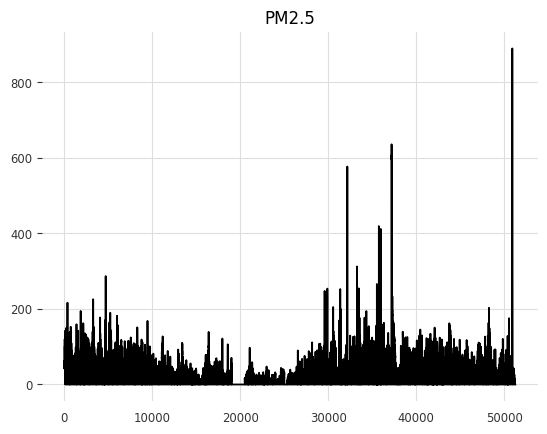

In [ ]:
# plot the each columns
ndf['PM2.5'].plot(title='PM2.5')

<Axes: >

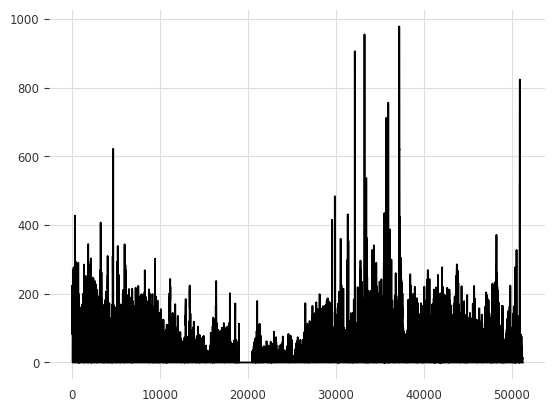

In [ ]:
ndf['PM10'].plot()

<Axes: >

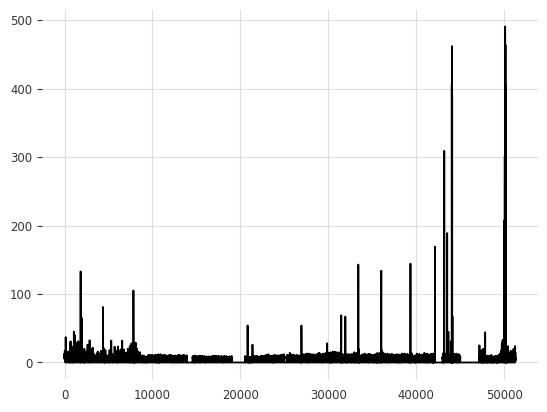

In [ ]:
ndf['NO'].plot()

<Axes: >

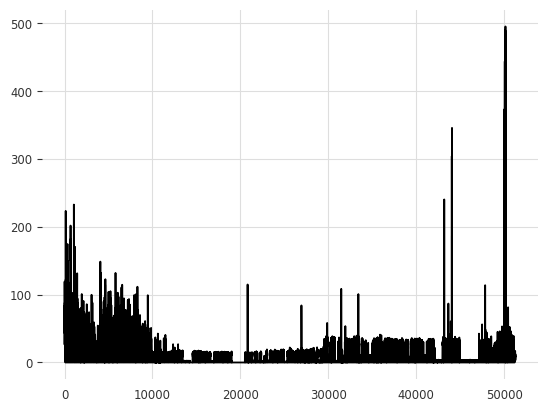

In [ ]:
ndf['NO2'].plot()

<Axes: >

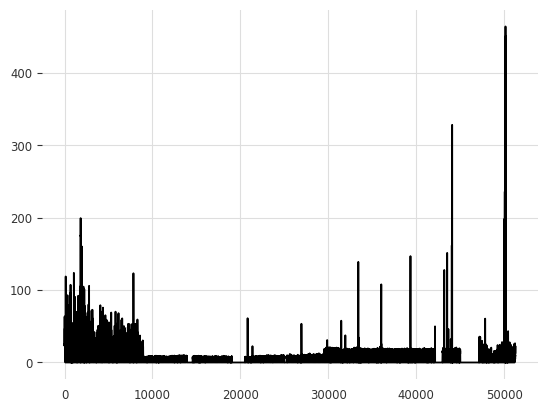

In [ ]:
ndf['NOx'].plot()

## Darts modeling

1. Timeseries object

In [ ]:
ndf.columns

Index(['From Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
       'Ozone'],
      dtype='object')

In [ ]:
ndf.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,2021-01-01 00:00:00,60.50,118.02,7.0,48.61,25.86,10.19,1.18,1.46,39.32
1,2021-01-01 00:15:00,54.40,107.20,9.0,43.36,23.07,9.93,3.70,1.44,40.28
2,2021-01-01 00:30:00,62.30,120.44,11.0,53.99,28.72,9.47,3.41,1.48,33.73
3,2021-01-01 00:45:00,60.72,117.71,7.0,53.32,28.36,9.15,3.94,1.48,31.50
4,2021-01-01 01:00:00,59.77,116.14,13.0,69.67,37.06,7.90,3.32,1.43,25.99


In [ ]:
df_hourly = ndf.set_index('From Date').resample('H').mean().reset_index()

In [ ]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  16920 non-null  datetime64[ns]
 1   PM2.5      12816 non-null  float64       
 2   PM10       12816 non-null  float64       
 3   NO         12816 non-null  float64       
 4   NO2        12816 non-null  float64       
 5   NOx        12816 non-null  float64       
 6   NH3        12816 non-null  float64       
 7   SO2        12816 non-null  float64       
 8   CO         12816 non-null  float64       
 9   Ozone      12816 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.3 MB


In [ ]:
df_hourly['PM2.5'] = df_hourly['PM2.5'].fillna(df_hourly['PM2.5'].mean())
df_hourly['PM10'] = df_hourly['PM10'].fillna(df_hourly['PM10'].mean())
df_hourly['NO'] = df_hourly['NO'].fillna(df_hourly['NO'].mean())
df_hourly['NO2'] = df_hourly['NO2'].fillna(df_hourly['NO2'].mean())
df_hourly['NOx'] = df_hourly['NOx'].fillna(df_hourly['NOx'].mean())
df_hourly['NH3'] = df_hourly['NH3'].fillna(df_hourly['NH3'].mean())
df_hourly['SO2'] = df_hourly['SO2'].fillna(df_hourly['SO2'].mean())
df_hourly['CO'] = df_hourly['CO'].fillna(df_hourly['CO'].mean())
df_hourly['Ozone'] = df_hourly['Ozone'].fillna(df_hourly['Ozone'].mean())

In [ ]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  16920 non-null  datetime64[ns]
 1   PM2.5      16920 non-null  float64       
 2   PM10       16920 non-null  float64       
 3   NO         16920 non-null  float64       
 4   NO2        16920 non-null  float64       
 5   NOx        16920 non-null  float64       
 6   NH3        16920 non-null  float64       
 7   SO2        16920 non-null  float64       
 8   CO         16920 non-null  float64       
 9   Ozone      16920 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.3 MB


In [ ]:
# convert datetime into darts timeseries object
ts = TimeSeries.from_dataframe(df=df_hourly, time_col='From Date', value_cols= ['PM2.5'], fill_missing_dates=True, freq=None)

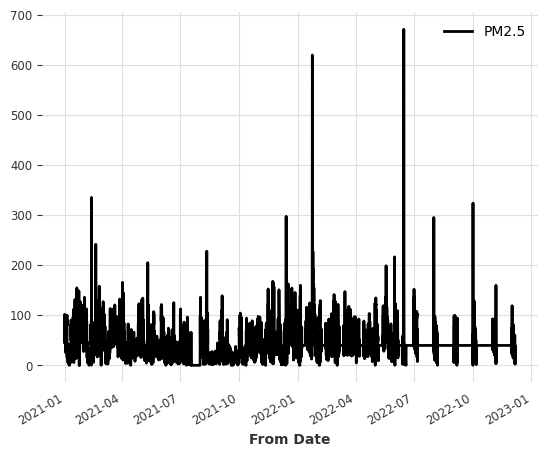

In [ ]:
ts.plot()

In [ ]:
# split the timeseries after 1st of october 2022
train, val = ts.split_after(pd.Timestamp("20221001"))

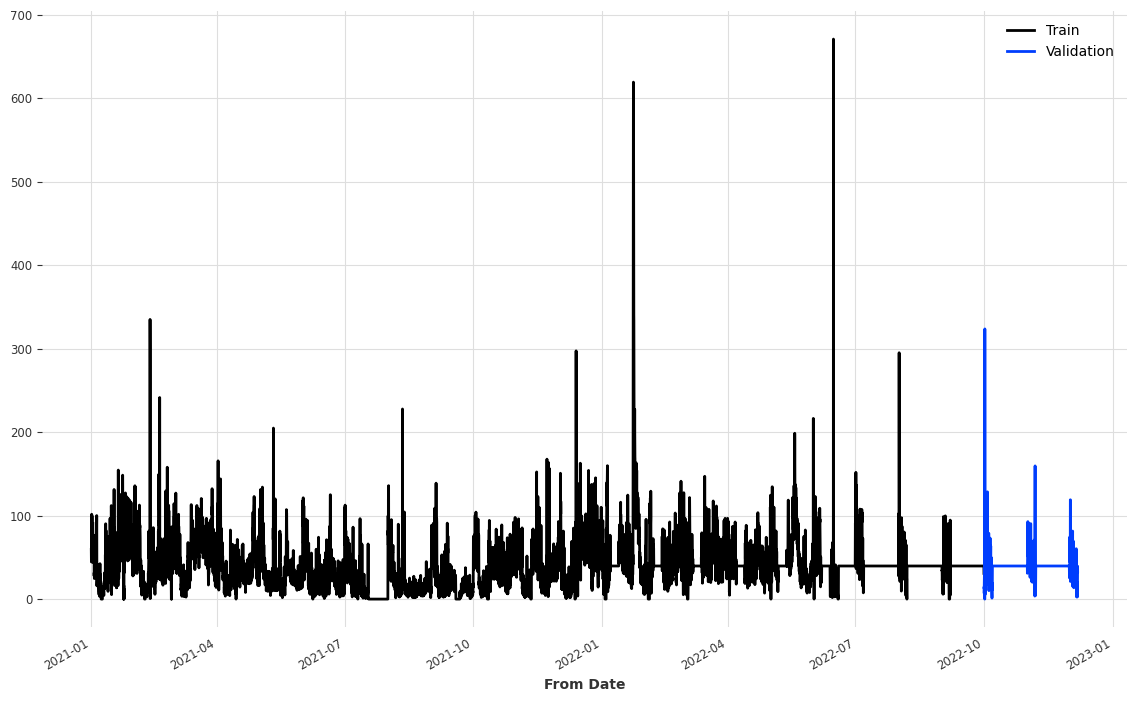

In [ ]:
plt.figure(figsize=(14,8))
train.plot(label='Train')
val.plot(label='Validation')